# 📝 Exercise M2.01

The aim of this exercise is to make the following experiments:

* train and test a support vector machine classifier through
  cross-validation;
* study the effect of the parameter gamma of this classifier using a
  validation curve;
* use a learning curve to determine the usefulness of adding new
  samples in the dataset when building a classifier.

To make these experiments we will first load the blood transfusion dataset.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [15]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

We will use a support vector machine classifier (SVM). In its most simple
form, a SVM classifier is a linear classifier behaving similarly to a
logistic regression. Indeed, the optimization used to find the optimal
weights of the linear model are different but we don't need to know these
details for the exercise.

Also, this classifier can become more flexible/expressive by using a
so-called kernel that makes the model become non-linear. Again, no requirement
regarding the mathematics is required to accomplish this exercise.

We will use an RBF kernel where a parameter `gamma` allows to tune the
flexibility of the model.

First let's create a predictive pipeline made of:

* a [`sklearn.preprocessing.StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
  with default parameter;
* a [`sklearn.svm.SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
  where the parameter `kernel` could be set to `"rbf"`. Note that this is the
  default.

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

model = make_pipeline(StandardScaler(), SVC())

In [7]:
# SVC(kernel="rbf").get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

Evaluate the generalization performance of your model by cross-validation with a
`ShuffleSplit` scheme. Thus, you can use
[`sklearn.model_selection.cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
and pass a [`sklearn.model_selection.ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)
to the `cv` parameter. Only fix the `random_state=0` in the `ShuffleSplit`
and let the other parameters to the default.

In [18]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

shuffle_s = ShuffleSplit(random_state=0)
cv_results1 = cross_validate(model, data, target, cv=shuffle_s, n_jobs=2)

In [19]:
# solution
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(random_state=0)
cv_results = cross_validate(model, data, target, cv=cv, n_jobs=2)
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score
0,0.026699,0.006773,0.680000
1,0.025780,0.004211,0.746667
2,0.033066,0.007119,0.786667
3,0.027650,0.006336,0.800000
4,0.020004,0.004102,0.746667
5,0.015912,0.003894,0.786667
6,0.016849,0.004288,0.800000
7,0.014703,0.006922,0.826667
8,0.037217,0.006338,0.746667
9,0.036381,0.004355,0.733333


In [20]:
f"{cv_results1['test_score'].mean():.3f} +/- {cv_results1['test_score'].std():.3f}"

'0.765 +/- 0.041'

As previously mentioned, the parameter `gamma` is one of the parameters
controlling under/over-fitting in support vector machine with an RBF kernel.

Evaluate the effect of the parameter `gamma` by using the
[`sklearn.model_selection.validation_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html) function.
You can leave the default `scoring=None` which is equivalent to
`scoring="accuracy"` for classification problems. You can vary `gamma`
between `10e-3` and `10e2` by generating samples on a logarithmic scale
with the help of `np.logspace(-3, 2, num=30)`.

Since we are manipulating a `Pipeline` the parameter name will be set to
`svc__gamma` instead of only `gamma`. You can retrieve the parameter name
using `model.get_params().keys()`. We will go more into detail regarding
accessing and setting hyperparameter in the next section.

In [6]:
# model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'svc', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [21]:
import numpy as np
gamma_range = np.logspace(-3, 2, num=30)
gamma_range

array([1.00000000e-03, 1.48735211e-03, 2.21221629e-03, 3.29034456e-03,
       4.89390092e-03, 7.27895384e-03, 1.08263673e-02, 1.61026203e-02,
       2.39502662e-02, 3.56224789e-02, 5.29831691e-02, 7.88046282e-02,
       1.17210230e-01, 1.74332882e-01, 2.59294380e-01, 3.85662042e-01,
       5.73615251e-01, 8.53167852e-01, 1.26896100e+00, 1.88739182e+00,
       2.80721620e+00, 4.17531894e+00, 6.21016942e+00, 9.23670857e+00,
       1.37382380e+01, 2.04335972e+01, 3.03919538e+01, 4.52035366e+01,
       6.72335754e+01, 1.00000000e+02])

In [22]:
from sklearn.model_selection import validation_curve

train_scores1, test_scores1 = validation_curve(model, data, target, param_name="svc__gamma", param_range=gamma_range, cv=shuffle_s, n_jobs=2)

In [23]:
# solution
import numpy as np
from sklearn.model_selection import validation_curve

gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"
train_scores, test_scores = validation_curve(
    model, data, target, param_name=param_name, param_range=gammas, cv=cv,
    n_jobs=2)

In [15]:
# train_errors, test_errors = -train_scores, -test_scores
# train_size, train_scores, test_scores = results[:3]

Plot the validation curve for the train and test scores.

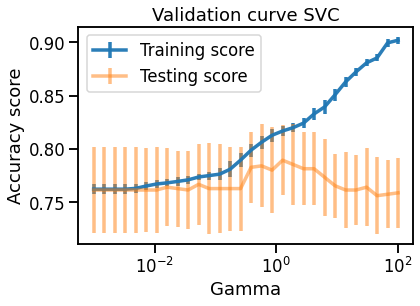

In [30]:
import matplotlib.pyplot as plt

# plt.plot(gamma_range, train_errors.mean(axis=1))
# plt.plot(gamma_range, test_errors.mean(axis=1))

plt.errorbar(gamma_range, train_scores1.mean(axis=1),
             yerr=train_scores1.std(axis=1), alpha=.95, label='Training score')
plt.errorbar(gamma_range, test_scores1.mean(axis=1),
             yerr=test_scores1.std(axis=1), alpha=.5, label='Testing score')

plt.legend()

plt.xscale("log")
plt.xlabel("Gamma")
plt.ylabel("Accuracy score")
_ = plt.title("Validation curve SVC")

'''Did we get training on using '''

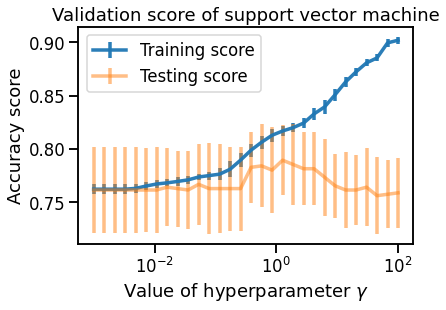

In [44]:
# solution
import matplotlib.pyplot as plt

plt.errorbar(
    gamma_range,
    train_scores1.mean(axis=1),
    yerr=train_scores1.std(axis=1),
    alpha=0.95,
    label="Training score",
)
plt.errorbar(
    gamma_range,
    test_scores1.mean(axis=1),
    yerr=test_scores1.std(axis=1),
    alpha=0.5,
    label="Testing score",
)
plt.legend()

plt.xscale("log")
plt.xlabel(r"Value of hyperparameter $\gamma$")
plt.ylabel("Accuracy score")
_ = plt.title("Validation score of support vector machine")

In [49]:
test_scores1
len(test_scores1)
len(test_scores1[0])
test_scores1.mean(axis=0)
test_scores1.mean(axis=1)

array([0.76133333, 0.76133333, 0.76133333, 0.76133333, 0.76133333,
       0.76133333, 0.76133333, 0.764     , 0.76266667, 0.76133333,
       0.76666667, 0.76266667, 0.76266667, 0.76266667, 0.76266667,
       0.78266667, 0.784     , 0.78      , 0.78933333, 0.78533333,
       0.78133333, 0.78133333, 0.77333333, 0.76533333, 0.76133333,
       0.76133333, 0.764     , 0.756     , 0.75733333, 0.75866667])

Now, you can perform an analysis to check whether adding new samples to the
dataset could help our model to better generalize. Compute the learning curve
(using [`sklearn.model_selection.learning_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html))
by computing the train and test scores for different training dataset size.
Plot the train and test scores with respect to the number of samples.

In [32]:
train_sizes = np.linspace(0.1, 1.0, num=10)
train_sizes

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [34]:
from sklearn.model_selection import learning_curve

results = learning_curve(
    model, data, target, train_sizes=train_sizes, cv=shuffle_s)

In [35]:
train_size, train_scores, test_scores = results
# train_errors, test_errors = -train_scores, -test_scores

Text(0, 0.5, 'Accuracy')

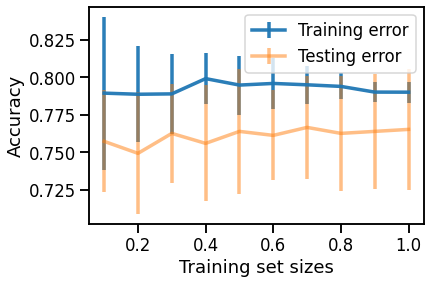

In [37]:
import matplotlib.pyplot as plt

# plt.plot(gamma_range, train_errors.mean(axis=1))
# plt.plot(gamma_range, test_errors.mean(axis=1))

plt.errorbar(train_sizes, train_scores.mean(axis=1),
             yerr=train_scores.std(axis=1), alpha=0.95, label='Training error')
plt.errorbar(train_sizes, test_scores.mean(axis=1),
             yerr=test_scores.std(axis=1), alpha=0.5, label='Testing error')

plt.legend()

plt.xlabel("Training set sizes")
plt.ylabel("Accuracy")